In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!

import os
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
csv_path = os.path.join("..", "data", "DM_AIAI_CustomerDB.csv")

df_customer = pd.read_csv(csv_path, sep=",")

In [3]:
df_customer.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [4]:
df_customer.columns

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [5]:
df_customer.columns[0]

'Unnamed: 0'

In [6]:
df_customer.drop(columns=df_customer.columns[0], inplace=True)

In [7]:
df_customer.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

tranformar canceled date em bool se cancelou ou não? ou a data é importante -> podemos depois estudar individualmente quais cancelaram para estudar melhor (?)
check se os que faltam income e costumer lifetime value sao os mesmos ? apagar ->

In [8]:
df_customer.shape

(16921, 20)

In [9]:
print(df_customer["EnrollmentType"].unique())
print(df_customer["LoyaltyStatus"].unique())

['Standard' '2021 Promotion']
['Star' 'Aurora' 'Nova']


In [10]:
df_customer.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [11]:
df_customer_cancelations = df_customer[df_customer['CancellationDate'].notna()].copy()

df_customer['canceled'] = df_customer['CancellationDate'].notna().astype(int)

In [12]:
#df_customer.drop(columns=['CancellationDate'], inplace=True)
df_customer['CancellationDate'].fillna('Not Canceled', inplace=True)
df_customer.head()
df_customer.tail()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,canceled
16916,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,...,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard,1
16917,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,...,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard,1
16918,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,...,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard,1
16919,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,...,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard,1
16920,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,M4A 1E4,...,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard,1


In [13]:
# how many people canceled their subscription?
#df_customer['canceled'].value_counts()
#percentage of people who canceled their subscription
df_customer['canceled'].value_counts(normalize=True) * 100

canceled
0    86.348325
1    13.651675
Name: proportion, dtype: float64

In [14]:
canceled_customers = df_customer[df_customer['canceled'] == 1]
days_until_cancellation = (
    pd.to_datetime(canceled_customers['CancellationDate'], errors='coerce') -
    pd.to_datetime(canceled_customers['EnrollmentDateOpening'], errors='coerce')
).dt.days

print(f"Average days until cancellation (canceled == 1): {days_until_cancellation.mean():.2f}")

Average days until cancellation (canceled == 1): 362.18


In [15]:
df_customer.isna().sum()

Loyalty#                    0
First Name                  0
Last Name                   0
Customer Name               0
Country                     0
Province or State           0
City                        0
Latitude                    0
Longitude                   0
Postal code                 0
Gender                      0
Education                   0
Location Code               0
Income                     20
Marital Status              0
LoyaltyStatus               0
EnrollmentDateOpening       0
CancellationDate            0
Customer Lifetime Value    20
EnrollmentType              0
canceled                    0
dtype: int64

In [16]:
mask = df_customer['Customer Lifetime Value'].isna() & df_customer['Income'].isna()
print(mask.sum())  # both are missing
print(df_customer[mask].index)  

20
Index([16901, 16902, 16903, 16904, 16905, 16906, 16907, 16908, 16909, 16910,
       16911, 16912, 16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920],
      dtype='int64')


In [17]:
# Show a table of all customers with both Income == 0 and Customer Lifetime Value == 0
zero_income_and_lifetime = df_customer[(df_customer['Income'].isna()) & (df_customer['Customer Lifetime Value'].isna())]
display(zero_income_and_lifetime)

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,canceled
16901,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,...,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard,1
16902,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,...,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard,1
16903,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,...,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard,1
16904,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,...,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard,1
16905,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,...,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard,1
16906,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,...,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard,1
16907,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,...,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard,1
16908,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,...,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard,1
16909,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,...,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard,1
16910,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,B4W 4M6,...,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard,1


In [18]:
#How many countries are represented in the dataset?
print(df_customer['Country'].nunique())
print(df_customer['Country'].unique())

1
['Canada']


In [19]:
df_customer.dropna(subset=['Income', 'Customer Lifetime Value'], inplace=True)

In [20]:
df_customer.isna().sum()

Loyalty#                   0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Latitude                   0
Longitude                  0
Postal code                0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
LoyaltyStatus              0
EnrollmentDateOpening      0
CancellationDate           0
Customer Lifetime Value    0
EnrollmentType             0
canceled                   0
dtype: int64

In [21]:
# All the customers are from the same country, so we can drop this column
df_customer.drop(columns=['Country'], inplace=True)

In [22]:
df_customer.drop(columns=['Customer Name'], inplace=True)

In [23]:
# Check how many rows have Income equal to 0
zero_income_count = (df_customer['Income'] == 0.0).sum()
print(f"Number of rows where Income is 0: {zero_income_count}")

Number of rows where Income is 0: 4273


In [24]:
zero_income_college = df_customer[(df_customer['Income'] == 0.0) & (df_customer['Education'] == 'College')]
print(f"Number of individuals with 0.0 income and in college: {len(zero_income_college)}")

Number of individuals with 0.0 income and in college: 4273


In [25]:
# we can assume that these individuals are students and therefore have a 0.0 income
#likely, their parents pay for their expenses and they have a high customer lifetime value
#or maybe they just dont have a fixed income


In [26]:
zero_income_college = df_customer[(df_customer['Income'] == 0.0) & (df_customer['Education'] == 'College')]
print(f"Number of individuals with 0.0 income and in college: {len(zero_income_college)}")

zero_income = df_customer[df_customer['Income'] == 0.0]
mean_income = df_customer[df_customer['Income'] != 0.0]
print(f"Number of individuals with 0.0 income: {len(zero_income)}")
print(f"Mean Customer Lifetime Value for 0.0 income individuals: {zero_income['Customer Lifetime Value'].mean()}")
print(f"Mean Customer Lifetime Value for non-0.0 income individuals: {mean_income['Customer Lifetime Value'].mean()}")

Number of individuals with 0.0 income and in college: 4273
Number of individuals with 0.0 income: 4273
Mean Customer Lifetime Value for 0.0 income individuals: 7585.778251813714
Mean Customer Lifetime Value for non-0.0 income individuals: 8127.394453595185


All individuals with 0.0 income are in college (4273 out of 4273).
The mean Customer Lifetime Value for these college/0.0 income individuals is 7585.78, which is slightly lower than for those with non-zero income (8127.39).
This suggests that college students (with 0.0 income) still have a substantial lifetime value, but not as high as other customers.
The data likely treats college students as having no personal income, but they remain valuable customers, possibly due to spending supported by family or other sources.

In [27]:
print(f"Number of duplicate rows: {df_customer.duplicated().sum()}")


Number of duplicate rows: 0


In [28]:
for col in ["Income", "Customer Lifetime Value"]:
    lower, upper = df_customer[col].quantile([0.01, 0.99])
    outliers = (df_customer[col] < lower) | (df_customer[col] > upper)
    print(f"Number of outliers in '{col}' (outside 1st and 99th percentiles): {outliers.sum()}")

Number of outliers in 'Income' (outside 1st and 99th percentiles): 168
Number of outliers in 'Customer Lifetime Value' (outside 1st and 99th percentiles): 338


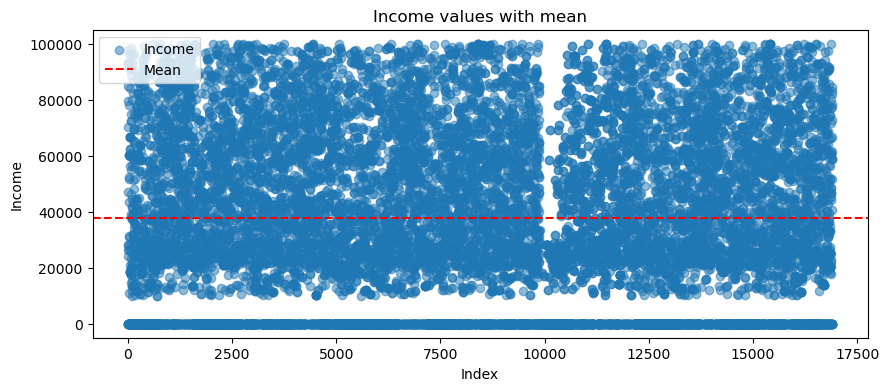

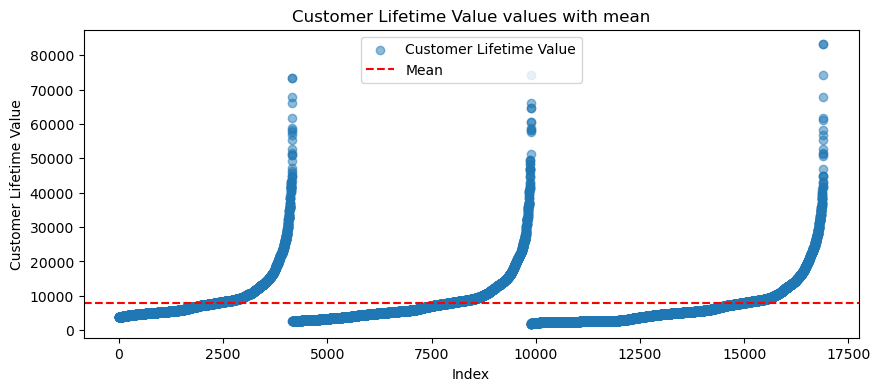

In [29]:
import matplotlib.pyplot as plt

for col in ["Income", "Customer Lifetime Value"]:
    plt.figure(figsize=(10, 4))
    plt.scatter(df_customer.index, df_customer[col], alpha=0.5, label=col)
    plt.axhline(df_customer[col].mean(), color='red', linestyle='--', label='Mean')
    plt.title(f"{col} values with mean")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()

<Axes: xlabel='City'>

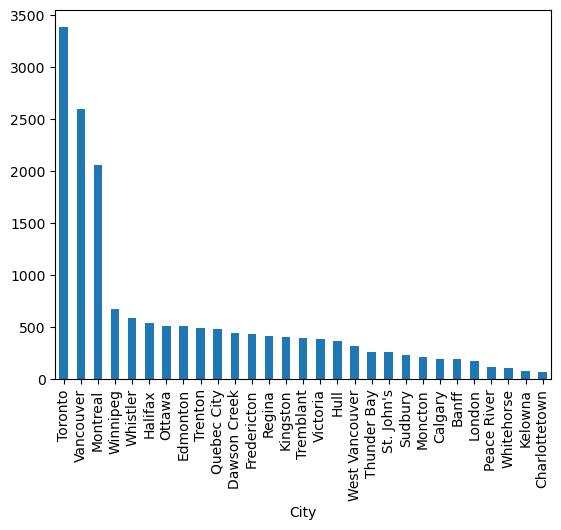

In [30]:
df_customer['City'].value_counts()
df_customer['City'].value_counts().plot(kind='bar')

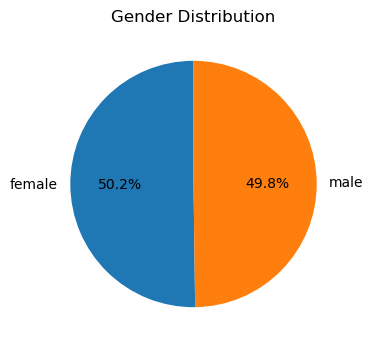

In [59]:
plt.figure(figsize=(6,4))
df_customer["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

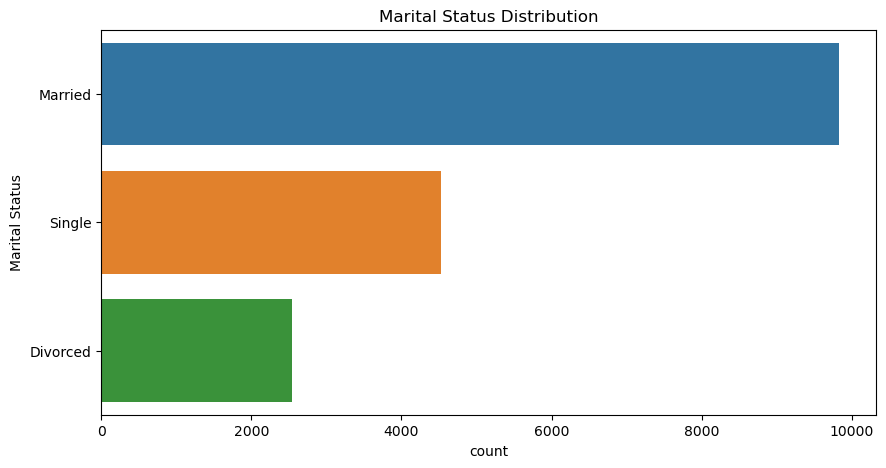

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(y="Marital Status", data=df_customer, order=df_customer["Marital Status"].value_counts().index)
plt.title("Marital Status Distribution")
plt.show()

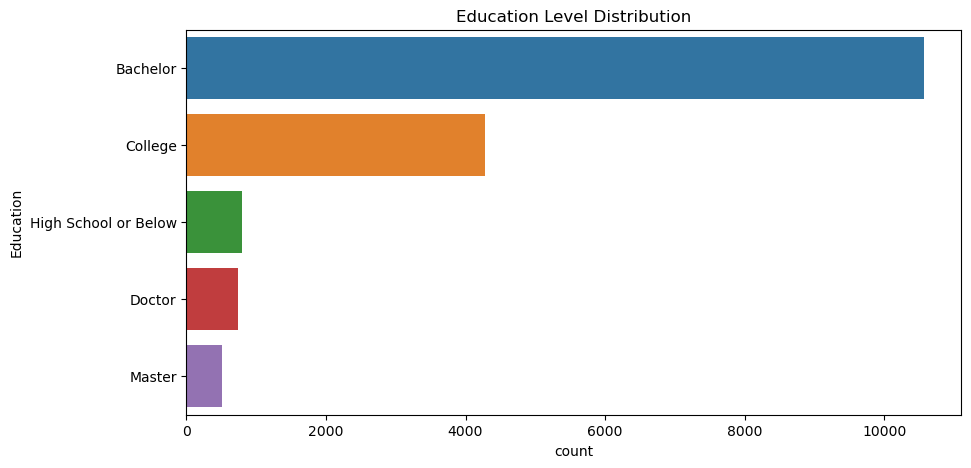

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(y="Education", data=df_customer, order=df_customer["Education"].value_counts().index)
plt.title("Education Level Distribution")
plt.show()

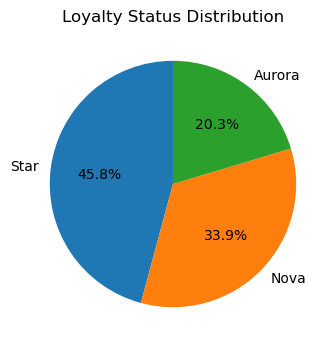

In [61]:
plt.figure(figsize=(6,4))
df_customer["LoyaltyStatus"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Loyalty Status Distribution")
plt.ylabel("")
plt.show()

In [31]:
df_flights = pd.read_csv('DM_AIAI_FlightsDB.csv')
#df_flights = df_flights.drop(columns=['YearMonthDate'])
df_flights["YearMonthDate"] = pd.to_datetime(df_flights["YearMonthDate"], errors="coerce")
df_flights

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.00,0.0,0.0
1,464105,2021,12,2021-12-01,0.0,0.0,0.0,0.00,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.00,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.00,3213.0,32.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,2019-12-01,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,2019-12-01,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0


In [32]:
df_flights['NumFlights'] = [int(i) for i in df_flights['NumFlights']]
df_flights['NumFlights'].value_counts()
df_flights['NumFlightsWithCompanions'] = [int(i) for i in df_flights['NumFlightsWithCompanions']]
df_flights['NumFlightsWithCompanions'].value_counts()

NumFlightsWithCompanions
0     456766
2      27781
1      26541
3      26153
4      19603
5      18628
6      13419
7       9029
8       5321
9       3648
10      1071
11       476
Name: count, dtype: int64

In [33]:
def outlier_count(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        count = ((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)).sum()
        outliers[col] = count
    return pd.DataFrame(list(outliers.items()), columns=["Feature", "Outlier Count"])

print("\n Outliers in Customers Data:")
display(outlier_count(df_customer))




 Outliers in Customers Data:


,Feature,Outlier Count
0,Loyalty#,0
1,Latitude,112
2,Longitude,0
3,Income,0
4,Customer Lifetime Value,1501
5,canceled,2290


In [34]:
# Get the total number of flights for each customer from the flights database

# Group by 'Loyalty#' and sum 'NumFlights'
total_flights_per_customer = df_flights.groupby('Loyalty#')['NumFlights'].sum()

# Map the totals to the customer dataframe
df_customer['TotalNumFlights'] = df_customer['Loyalty#'].map(total_flights_per_customer).fillna(0).astype(int)

display(df_customer[['Loyalty#', 'TotalNumFlights']].head())

,Loyalty#,TotalNumFlights
0,480934,184
1,549612,275
2,429460,116
3,608370,191
4,530508,167


In [38]:
# Get the total number of flights with companions for each customer from the flights database

# Group by 'Loyalty#' and sum 'NumFlightsWithCompanions'
total_flights_with_companions = df_flights.groupby('Loyalty#')['NumFlightsWithCompanions'].sum()

# Map the totals to the customer dataframe
df_customer['TotalNumFlightsWithCompanions'] = df_customer['Loyalty#'].map(total_flights_with_companions).fillna(0).astype(int)

display(df_customer[['Loyalty#', 'TotalNumFlightsWithCompanions']].head())

,Loyalty#,TotalNumFlightsWithCompanions
0,480934,53
1,549612,30
2,429460,37
3,608370,55
4,530508,59


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


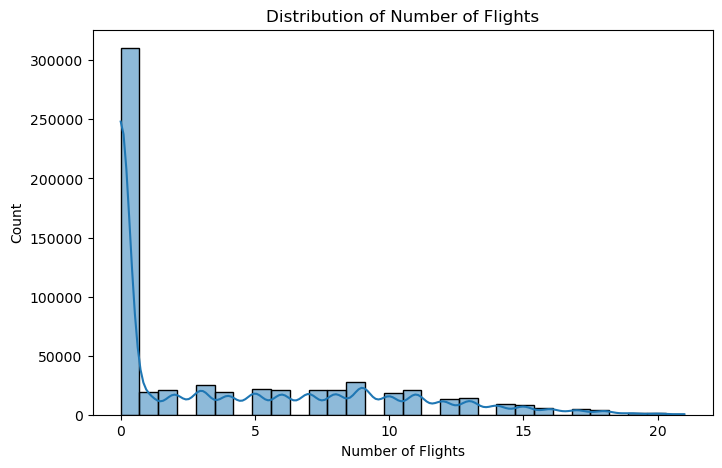

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


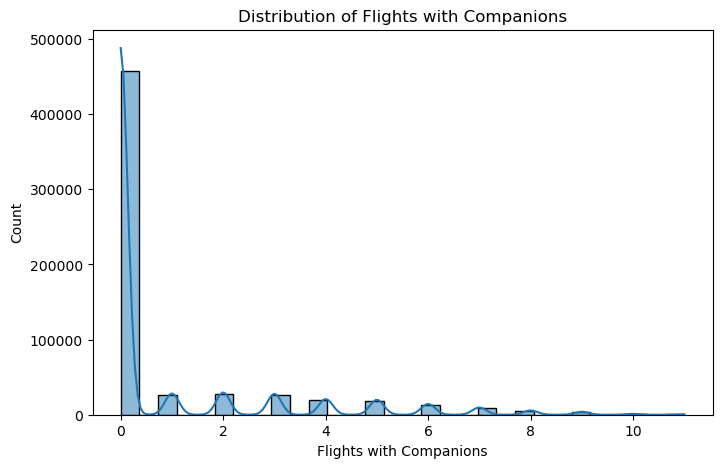

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df_flights["NumFlights"], bins=30, kde=True)
plt.title("Distribution of Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_flights["NumFlightsWithCompanions"], bins=30, kde=True)
plt.title("Distribution of Flights with Companions")
plt.xlabel("Flights with Companions")
plt.ylabel("Count")
plt.show()

/var/folders/7x/jzz8zkp55cb7t6rp3hdj_b0r0000gn/T/ipykernel_99687/4220586723.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_flights["NumFlights"], label="Total Flights", shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/7x/jzz8zkp55cb7t6rp3hdj_b0r0000gn/T/ipykernel_99687/4220586723.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_flights["NumFlightsWithCompanions"], label="Flights with Companions", shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

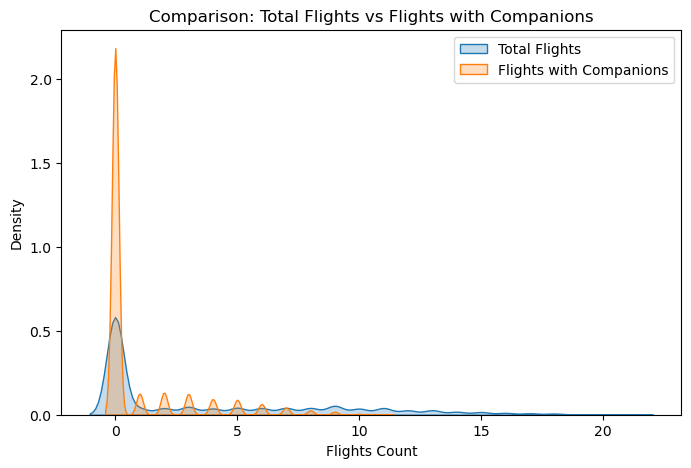

In [40]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_flights["NumFlights"], label="Total Flights", shade=True)
sns.kdeplot(df_flights["NumFlightsWithCompanions"], label="Flights with Companions", shade=True)
plt.title("Comparison: Total Flights vs Flights with Companions")
plt.xlabel("Flights Count")
plt.ylabel("Density")
plt.legend()
plt.show()


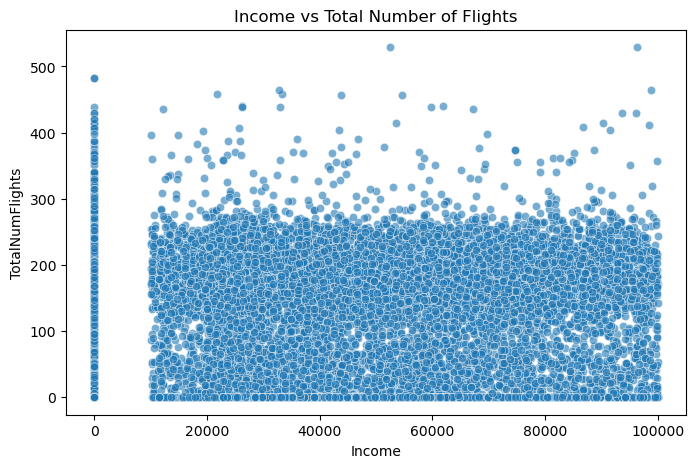

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_customer, x="Income", y="TotalNumFlights", alpha=0.6)
plt.title("Income vs Total Number of Flights")
plt.show()

In [50]:

zero_flights = df_customer[df_customer['TotalNumFlights'] == 0]

print(f"Number of customers with 0 flights: {len(zero_flights)}")
print(f"Average income of customers with 0 flights: {zero_flights['Income'].mean():.2f}")
print("EnrollmentType counts for customers with 0 flights:")
print(zero_flights['EnrollmentType'].value_counts())
print("LoyaltyStatus counts for customers with 0 flights:")
print(zero_flights['LoyaltyStatus'].value_counts())

Number of customers with 0 flights: 1529
Average income of customers with 0 flights: 38117.21
EnrollmentType counts for customers with 0 flights:
EnrollmentType
Standard          1487
2021 Promotion      42
Name: count, dtype: int64
LoyaltyStatus counts for customers with 0 flights:
LoyaltyStatus
Star      681
Nova      528
Aurora    320
Name: count, dtype: int64


In [54]:
# Check customers with 0 income and 0 flights
zero_income_zero_flights = df_customer[(df_customer['Income'] == 0) & (df_customer['TotalNumFlights'] == 0)]

print(f"Number of customers with 0 income and 0 flights: {len(zero_income_zero_flights)}")
print(f"Average Customer Lifetime Value: {zero_income_zero_flights['Customer Lifetime Value'].mean():.2f}")
print("EnrollmentType counts for customers with 0 income and 0 flights:")
print(zero_income_zero_flights['EnrollmentType'].value_counts())
display(zero_income_zero_flights)

Number of customers with 0 income and 0 flights: 354
Average Customer Lifetime Value: 8182.15
EnrollmentType counts for customers with 0 income and 0 flights:
EnrollmentType
Standard          340
2021 Promotion     14
Name: count, dtype: int64


,Loyalty#,First Name,Last Name,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,canceled,TotalNumFlights,TotalNumFlightsWithCompanions
67,329382,Ngoc,Dubuisson,Quebec,Montreal,45.501690,-73.567253,H2T 9K8,male,College,...,0.0,Single,Star,8/27/2015,Not Canceled,3961.59,2021 Promotion,0,0,0
84,322102,Hermelinda,Hilst,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,male,College,...,0.0,Married,Star,8/19/2016,4/19/2017,3992.58,Standard,1,0,0
95,566033,Cruz,Arlt,Ontario,Toronto,43.653225,-79.383186,M2P 4F6,male,College,...,0.0,Married,Star,6/16/2018,7/23/2019,4015.21,Standard,1,0,0
98,174896,Freeman,Decristoforo,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,female,College,...,0.0,Single,Star,4/16/2018,12/16/2018,4016.54,Standard,1,0,0
155,603248,Lynwood,Overmyer,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,...,0.0,Married,Star,2/10/2019,10/10/2019,4157.70,Standard,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,730795,Tran,Pipper,British Columbia,Victoria,48.428421,-123.365650,V10 6T5,male,College,...,0.0,Single,Star,7/30/2017,2/3/2019,24258.71,Standard,1,0,0
16782,656958,Jennie,Karrels,British Columbia,Dawson Creek,55.759628,-120.237660,U5I 4F1,female,College,...,0.0,Divorced,Star,10/8/2016,12/6/2016,29412.29,Standard,1,0,0
16784,741926,Noe,Keomuangtai,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,male,College,...,0.0,Single,Star,10/15/2021,Not Canceled,29706.78,Standard,0,0,0
16871,851979,Dion,Fagerstrom,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,male,College,...,0.0,Married,Star,11/6/2015,Not Canceled,39033.08,Standard,0,0,0


In [55]:
# Check customers with 0 flights who canceled vs those who did not, and their EnrollmentType and LoyaltyStatus

zero_flights = df_customer[df_customer['TotalNumFlights'] == 0]

canceled = zero_flights[zero_flights['canceled'] == 1]
not_canceled = zero_flights[zero_flights['canceled'] == 0]

print(f"Number of customers with 0 flights who canceled: {len(canceled)}")
print("EnrollmentType for customers with 0 flights who canceled:")
print(canceled['EnrollmentType'].value_counts())
print("LoyaltyStatus for customers with 0 flights who canceled:")
print(canceled['LoyaltyStatus'].value_counts())

print(f"\nNumber of customers with 0 flights who did NOT cancel: {len(not_canceled)}")
print("EnrollmentType for customers with 0 flights who did NOT cancel:")
print(not_canceled['EnrollmentType'].value_counts())
print("LoyaltyStatus for customers with 0 flights who did NOT cancel:")
print(not_canceled['LoyaltyStatus'].value_counts())

Number of customers with 0 flights who canceled: 972
EnrollmentType for customers with 0 flights who canceled:
EnrollmentType
Standard          956
2021 Promotion     16
Name: count, dtype: int64
LoyaltyStatus for customers with 0 flights who canceled:
LoyaltyStatus
Star      429
Nova      329
Aurora    214
Name: count, dtype: int64

Number of customers with 0 flights who did NOT cancel: 557
EnrollmentType for customers with 0 flights who did NOT cancel:
EnrollmentType
Standard          531
2021 Promotion     26
Name: count, dtype: int64
LoyaltyStatus for customers with 0 flights who did NOT cancel:
LoyaltyStatus
Star      252
Nova      199
Aurora    106
Name: count, dtype: int64


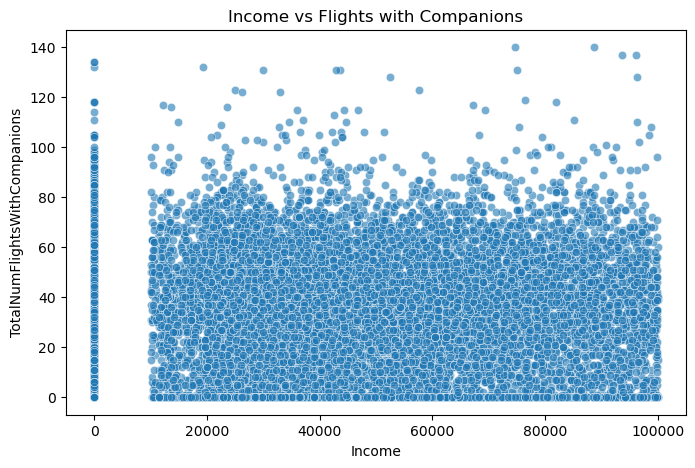

In [47]:
# Flights with companions vs Income
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_customer, x="Income", y="TotalNumFlightsWithCompanions", alpha=0.6)
plt.title("Income vs Flights with Companions")
plt.show()


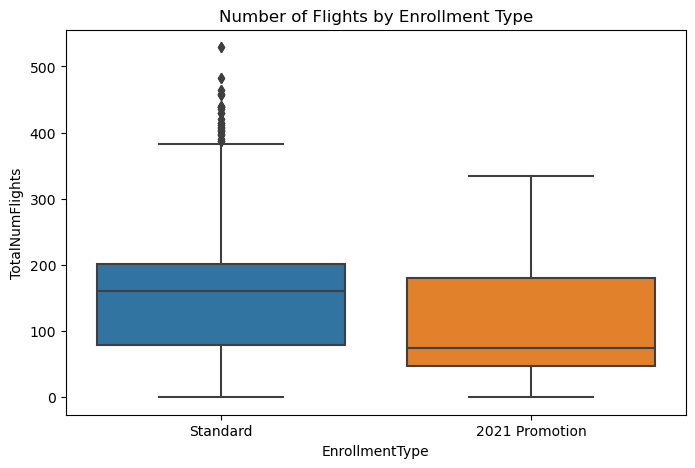

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_customer, x="EnrollmentType", y="TotalNumFlights")
plt.title("Number of Flights by Enrollment Type")
plt.show()

 

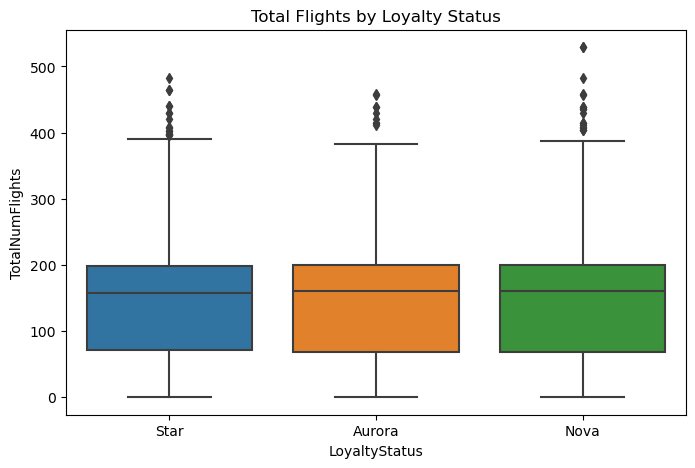

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_customer, x="LoyaltyStatus", y="TotalNumFlights")
plt.title("Total Flights by Loyalty Status")
plt.show()

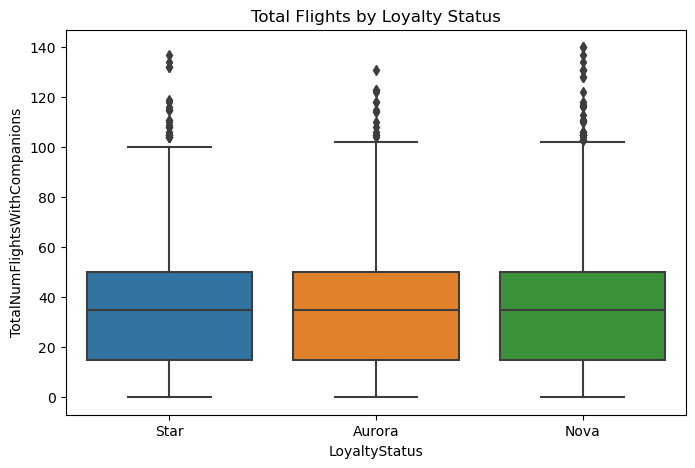

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_customer, x="LoyaltyStatus", y="TotalNumFlightsWithCompanions")
plt.title("Total Flights by Loyalty Status")
plt.show()

#points redeemed and points awardade wirh loyalty status

Average flights with companions by marital status:
Marital Status
Divorced    33.432283
Married     34.046897
Single      34.475612
Name: TotalNumFlightsWithCompanions, dtype: float64


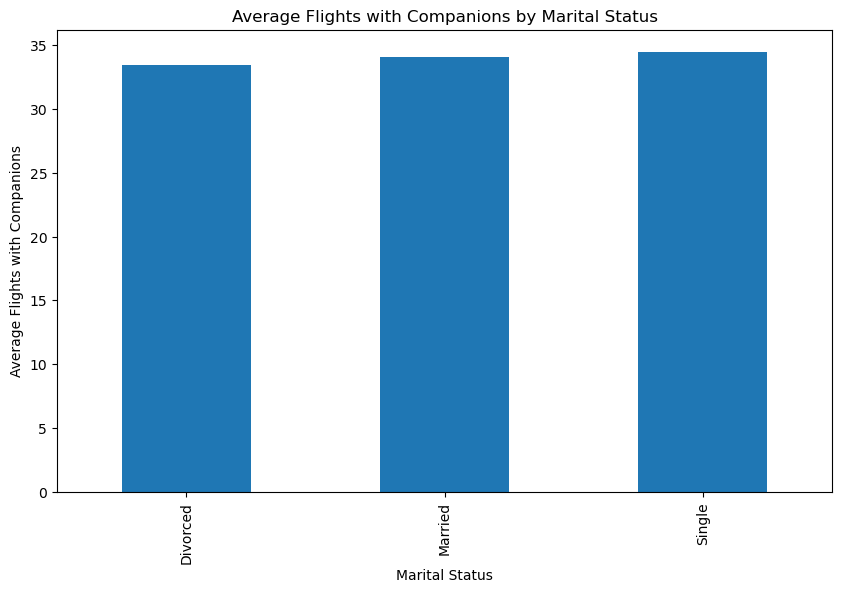

In [70]:
# Compare flights with companions by marital status (bar plot)

# Calculate average flights with companions for each marital status
avg_companion_flights = df_customer.groupby('Marital Status')['TotalNumFlightsWithCompanions'].mean()
print("Average flights with companions by marital status:")
print(avg_companion_flights)

# Bar plot for average flights with companions by marital status
plt.figure(figsize=(10,6))
avg_companion_flights.plot(kind='bar')
plt.title("Average Flights with Companions by Marital Status")
plt.ylabel("Average Flights with Companions")
plt.xlabel("Marital Status")
plt.show()